In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
data=pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
X=data[['bedrooms','bathrooms','sqft_living','floors']]
y=data['price']

In [4]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=0)

In [5]:
X_train.head()

,bedrooms,bathrooms,sqft_living,floors
8868,3,1.75,1260,2.0
19005,2,1.00,1060,2.0
13625,3,1.75,2770,1.0
9782,3,1.50,1460,1.0
6730,4,3.25,1790,2.0


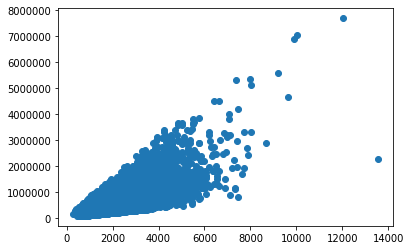

In [6]:
plt.scatter(X.sqft_living,y) #观察房价和生活面积的关系



Text(0, 0.5, 'count')

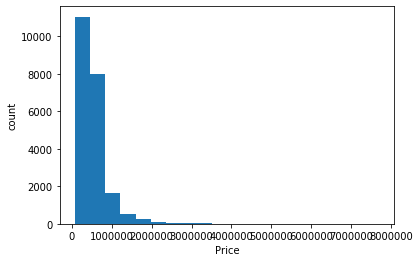

In [7]:
plt.hist(y,bins=20)
plt.xlabel('Price')
plt.ylabel('count')

#观察生活面积分布



In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
model.intercept_

70434.63078815443

In [10]:
y_predict=model.predict(X_test)

In [11]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
bedrooms,-50922.843332
bathrooms,3528.470832
sqft_living,300.531965
floors,5917.950285


In [12]:
print('MAE:', metrics.mean_absolute_error(y_test, y_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

MAE: 168932.32196474276
MSE: 69890356754.14203
RMSE: 264367.8436462007
